Monte Carlo Simulation Results (for 1000 simulations):
NPV mean: $445,610.44, NPV Median: $444,966.12, Standard Deviation: $64,622.76
IRR mean: %23.29, IRR Median: %23.30 Standard Deviation: %1.73


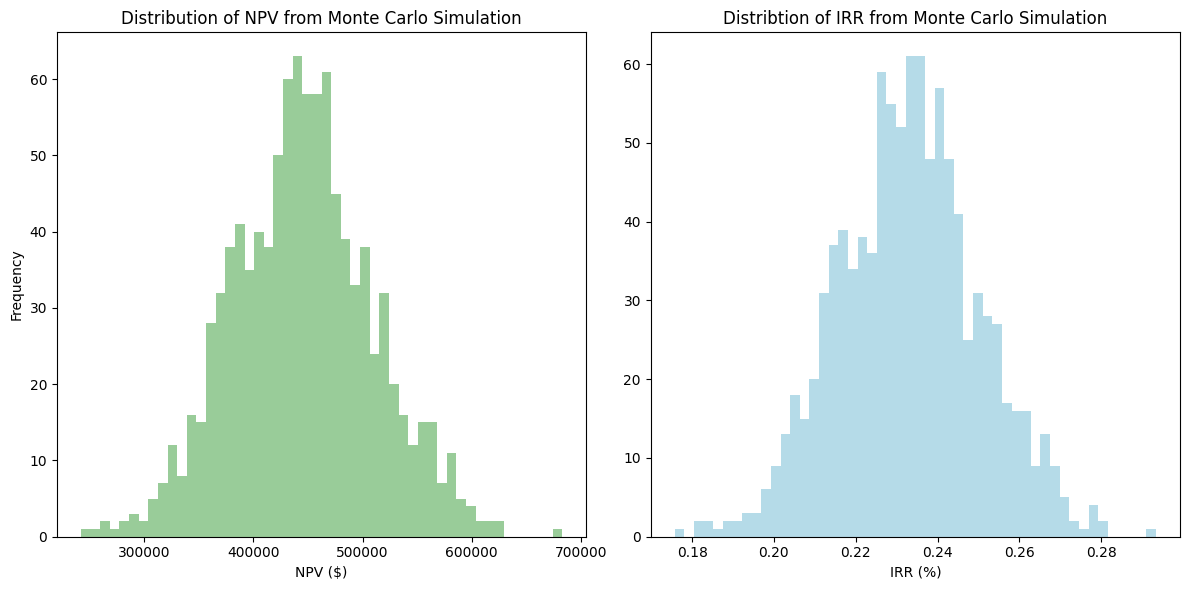

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf

class Investment:
    def __init__(self, outflows, proj_cash_flows, discount_rate, cash_flows_variation=0.1):
        try: # check if the input values are valid
            if outflows <= 0 or discount_rate < 0:
                raise ValueError("Outflows must be positive and discount rate non-negative.")
            if not all(isinstance(x, (int, float)) and x > 0 for x in proj_cash_flows): # check if all elements in proj_cash_flows are positive numbers
                raise ValueError("Projected cash flows must be a list of positive numbers.")
        except ValueError as e:
            print(f"Initialization Error: {e}")
            raise
        self.outflows = outflows
        self.proj_cash_flows = proj_cash_flows
        self.discount_rate = discount_rate
        self.cash_flows_variation = cash_flows_variation

    def calculate_NPV(self, proj_cash_flows):
        try:
            NPV = -self.outflows
            for t, cash_flow in enumerate(proj_cash_flows): 
                NPV += cash_flow / (1 + self.discount_rate) ** (t + 1) # calculate the NPV from the formula NPV = -C0 + Σ (Ct / (1 + r)^t)
            return NPV
        except Exception as Err: # identify any errors that may occur during the calculation
            print(f"Error calculating NPV: {Err}")
            return None
       
    def calculate_IRR(self, proj_cash_flows): # IRR is the discount rate that makes the NPV of an investment zero
        try: 
            proj_cash_flows_with_outflows = [-self.outflows] + proj_cash_flows # add the outflows to the list of cash flows
            IRR = npf.irr(proj_cash_flows_with_outflows) # calculate the IRR from imported numpy_financial formula
            return IRR
        except Exception as Err:
            print(f"Error calculating IRR: {Err}")
            return None
    
    def monte_carlo_simulation(self, iterations=1000):
        NPV_output = [] # create an empty list to store the NPV
        IRR_output = [] # create an empty list to store the IRR

        for i in range(iterations): # simulate cash flows with normal distribution in for loop
                try: # try to simulate cash flows
                    simulated_cash_flows = [np.random.normal(cash_flow, cash_flow * self.cash_flows_variation) for cash_flow in self.proj_cash_flows]
                    NPV_output.append(self.calculate_NPV(simulated_cash_flows)) # append simulated cash flows to the list of NPV
                    IRR_output.append(self.calculate_IRR(simulated_cash_flows)) # append simulated cash flows to the list of IRR
                except Exception as Err:
                    print(f"Simulation Error at iteration {i}: {Err}")
        return NPV_output, IRR_output
    
    def simulation_results(self, iterations=1000):
        NPV_output, IRR_output = self.monte_carlo_simulation(iterations)
        
        # Sort results for analysis
        sorted_NPV = sorted(NPV_output)
        sorted_IRR = sorted(IRR_output)

        # Find median and other percentiles
        NPV_median = sorted_NPV[len(sorted_NPV) // 2]
        IRR_median = sorted_IRR[len(sorted_IRR) // 2]

        NPV_mean = np.mean(NPV_output) # calculate mean of NPV
        IRR_mean = np.mean(IRR_output) # calculate mean of IRR
        NPV_std = np.std(NPV_output) # calculate standard deviation of NPV
        IRR_std = np.std(IRR_output) # calculate standard deviation of IRR

        print(f'Monte Carlo Simulation Results (for {iterations} simulations):') 
        print(f'NPV mean: ${NPV_mean:,.2f}, NPV Median: ${NPV_median:,.2f}, Standard Deviation: ${NPV_std:,.2f}')
        print(f'IRR mean: %{IRR_mean * 100:,.2f}, IRR Median: %{IRR_median * 100:,.2f} Standard Deviation: %{IRR_std * 100:,.2f}')

        self.plot_results(NPV_output, IRR_output) # call the method plot_results() to plot the results of the Monte Carlo Simulation
    
    def plot_results(self, NPV_output, IRR_output): #plotting distribution of simulation results in a histogram
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1) 
        plt.hist(NPV_output, bins=50, color='green', alpha=0.4)
        plt.title('Distribution of NPV from Monte Carlo Simulation')
        plt.xlabel('NPV ($)')
        plt.ylabel('Frequency')

        plt.subplot(1,2,2)
        plt.hist(IRR_output, bins=50, color='lightblue', alpha=0.9)   
        plt.title('Distribtion of IRR from Monte Carlo Simulation')
        plt.xlabel('IRR (%)')

        plt.tight_layout()
        plt.show()

#examplatory data:
if __name__ == '__main__':
    try:
        outflows = 1000000
        proj_cash_flows = [200000, 300000, 400000, 500000, 600000]
        discount_rate = 0.1

        investment = Investment(outflows, proj_cash_flows, discount_rate) # create an instance of the class Investment
        investment.simulation_results() # call the method simulation_results() to get the results of the Monte Carlo Simulation
    except Exception as Err:
        print(f"Unexpected error: {Err}")